<a href="https://colab.research.google.com/github/MiraInfern/ML/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание про практике 2**

In [ ]:
!pip install pandas seaborn scikit-learn

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

EDUCATION_DATA_FILE = "/education_inequality_data.csv"
df = pd.read_csv(EDUCATION_DATA_FILE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   school_name              1000 non-null   object 
 2   state                    1000 non-null   object 
 3   school_type              1000 non-null   object 
 4   grade_level              1000 non-null   object 
 5   funding_per_student_usd  1000 non-null   float64
 6   avg_test_score_percent   1000 non-null   float64
 7   student_teacher_ratio    1000 non-null   float64
 8   percent_low_income       1000 non-null   float64
 9   percent_minority         1000 non-null   float64
 10  internet_access_percent  1000 non-null   float64
 11  dropout_rate_percent     1000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 93.9+ KB


# Преобразование категориальных признаков

In [ ]:
categorical_cols = ['state', 'school_type', 'grade_level']
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       1000 non-null   int64   
 1   school_name              1000 non-null   object  
 2   state                    1000 non-null   category
 3   school_type              1000 non-null   category
 4   grade_level              1000 non-null   category
 5   funding_per_student_usd  1000 non-null   float64 
 6   avg_test_score_percent   1000 non-null   float64 
 7   student_teacher_ratio    1000 non-null   float64 
 8   percent_low_income       1000 non-null   float64 
 9   percent_minority         1000 non-null   float64 
 10  internet_access_percent  1000 non-null   float64 
 11  dropout_rate_percent     1000 non-null   float64 
dtypes: category(3), float64(7), int64(1), object(1)
memory usage: 74.0+ KB


# Разведочный Анализ EDA

Выбираем x и y

In [ ]:
y_eda = df['avg_test_score_percent']
X_eda = df.drop(columns=['avg_test_score_percent', 'id', 'school_name'])
print(X_eda.describe(include = 'all'))

        state school_type grade_level  funding_per_student_usd  \
count    1000        1000        1000              1000.000000   
unique     10           3           3                      NaN   
top     Texas     Private  Elementary                      NaN   
freq      119         355         345                      NaN   
mean      NaN         NaN         NaN             15154.160180   
std       NaN         NaN         NaN              5931.384208   
min       NaN         NaN         NaN              5012.970000   
25%       NaN         NaN         NaN              9726.040000   
50%       NaN         NaN         NaN             15362.465000   
75%       NaN         NaN         NaN             20280.007500   
max       NaN         NaN         NaN             24981.900000   

        student_teacher_ratio  percent_low_income  percent_minority  \
count             1000.000000         1000.000000       1000.000000   
unique                    NaN                 NaN               N

# Анализ категориальных переменных

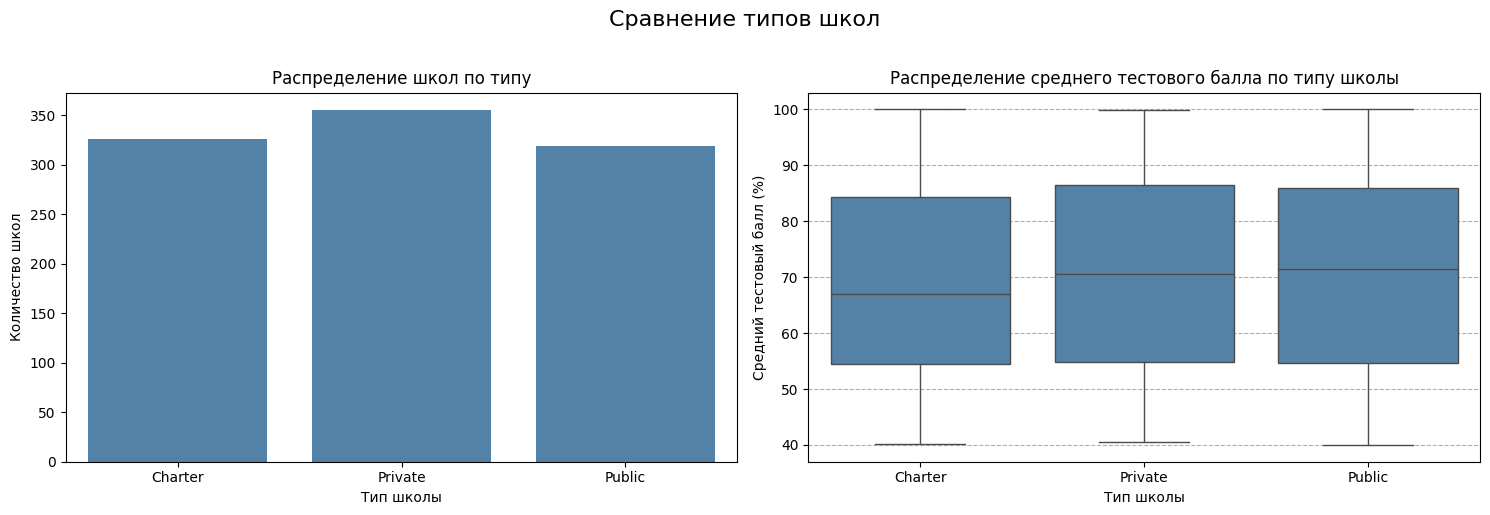

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=df, x='school_type', color='steelblue', ax=axes[0])
axes[0].set_title('Распределение школ по типу')
axes[0].set_xlabel('Тип школы')
axes[0].set_ylabel('Количество школ')
axes[0].tick_params(axis='x', rotation=0)

sns.boxplot(data=df, x='school_type', y='avg_test_score_percent', color='steelblue', ax=axes[1])
axes[1].set_title('Распределение среднего тестового балла по типу школы')
axes[1].set_xlabel('Тип школы')
axes[1].set_ylabel('Средний тестовый балл (%)')
axes[1].grid(axis='y', linestyle='--')

plt.suptitle('Сравнение типов школ', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

Частные школы в среднем показывают более высокие баллы, чем остальные и их больше по количеству.

Средний тестовый балл примерно одинаков для всех трёх типов школ, колеблясь в районе 70-75%.

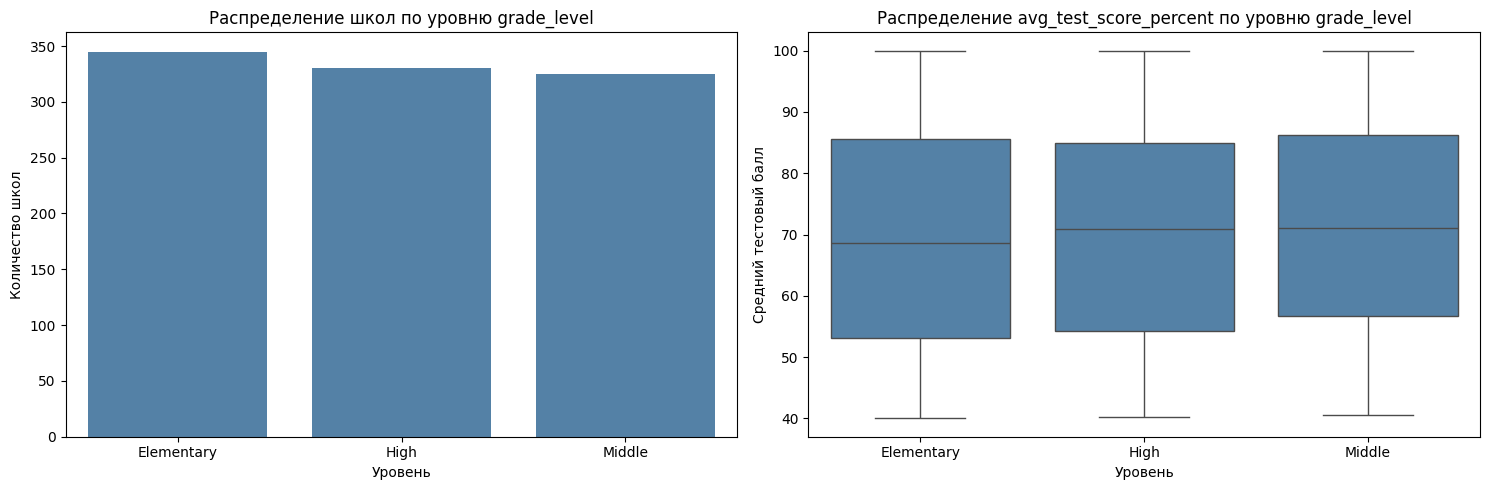

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(data=df, x='grade_level', color='steelblue', ax=axes[0])
axes[0].set_title('Распределение школ по уровню grade_level')
axes[0].set_xlabel('Уровень')
axes[0].set_ylabel('Количество школ')

sns.boxplot(data=df, x='grade_level', y='avg_test_score_percent', color='steelblue', ax=axes[1])
axes[1].set_title('Распределение avg_test_score_percent по уровню grade_level')
axes[1].set_xlabel('Уровень')
axes[1].set_ylabel('Средний тестовый балл')

plt.tight_layout()
plt.show()

Начальные школы имеют наибольшее количество.

Средний тестовый балл примерно одинаков для всех трёх типов школ (уровней), колеблясь в районе 70-75%.

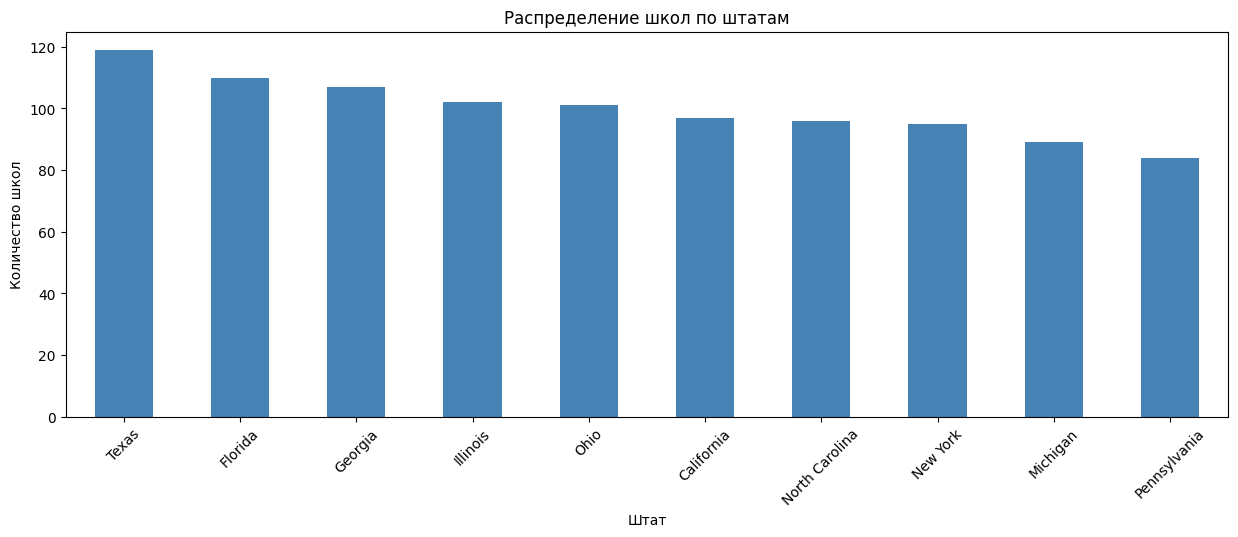

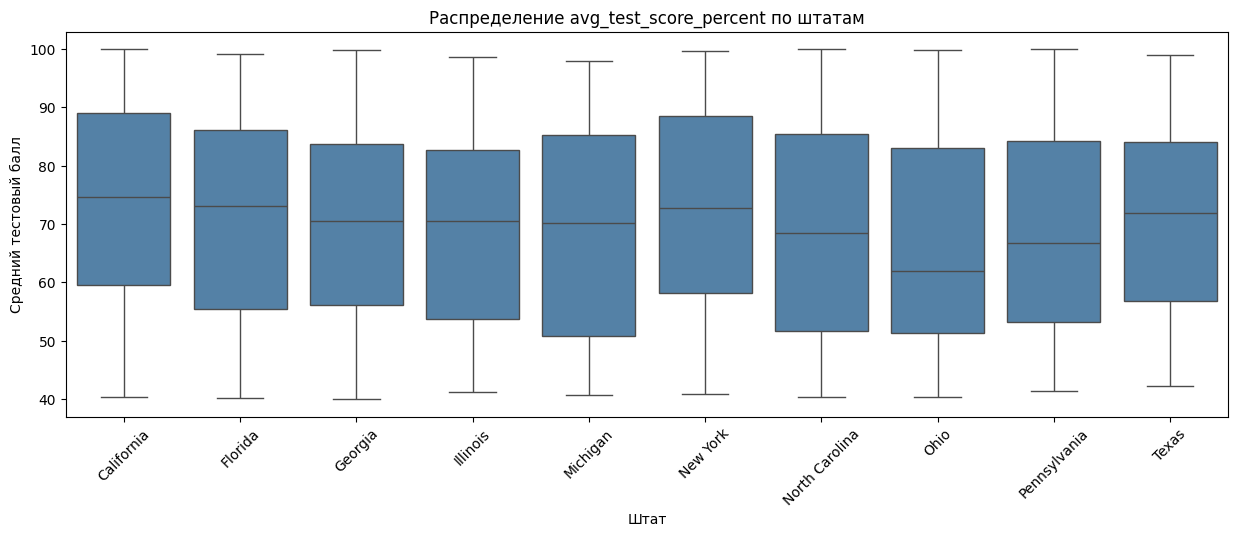

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
state_counts = df['state'].value_counts()
state_counts.plot(kind='bar', color='steelblue', ax=ax)
ax.set_title('Распределение школ по штатам')
ax.set_xlabel('Штат')
ax.set_ylabel('Количество школ')
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='state', y='avg_test_score_percent', color='steelblue', ax=ax)
ax.set_title('Распределение avg_test_score_percent по штатам')
ax.set_xlabel('Штат')
ax.set_ylabel('Средний тестовый балл')
ax.tick_params(axis='x', rotation=45)
plt.show()

По количеству школ, Техас лидирует, имея наибольшее число школ в наборе данных, в то время как Пенсильвания имеет наименьшее.

По среднему тестовому баллу, штаты демонстрируют схожие медианные результаты, колеблющиеся в диапазоне от 67% до 75%, при этом Калифорния и Нью-Йорк показывают самый высокий медианный балл, а Огайо и Северная Каролина — самый низкий, но разница минимальна.

# Анализ числовых признаков

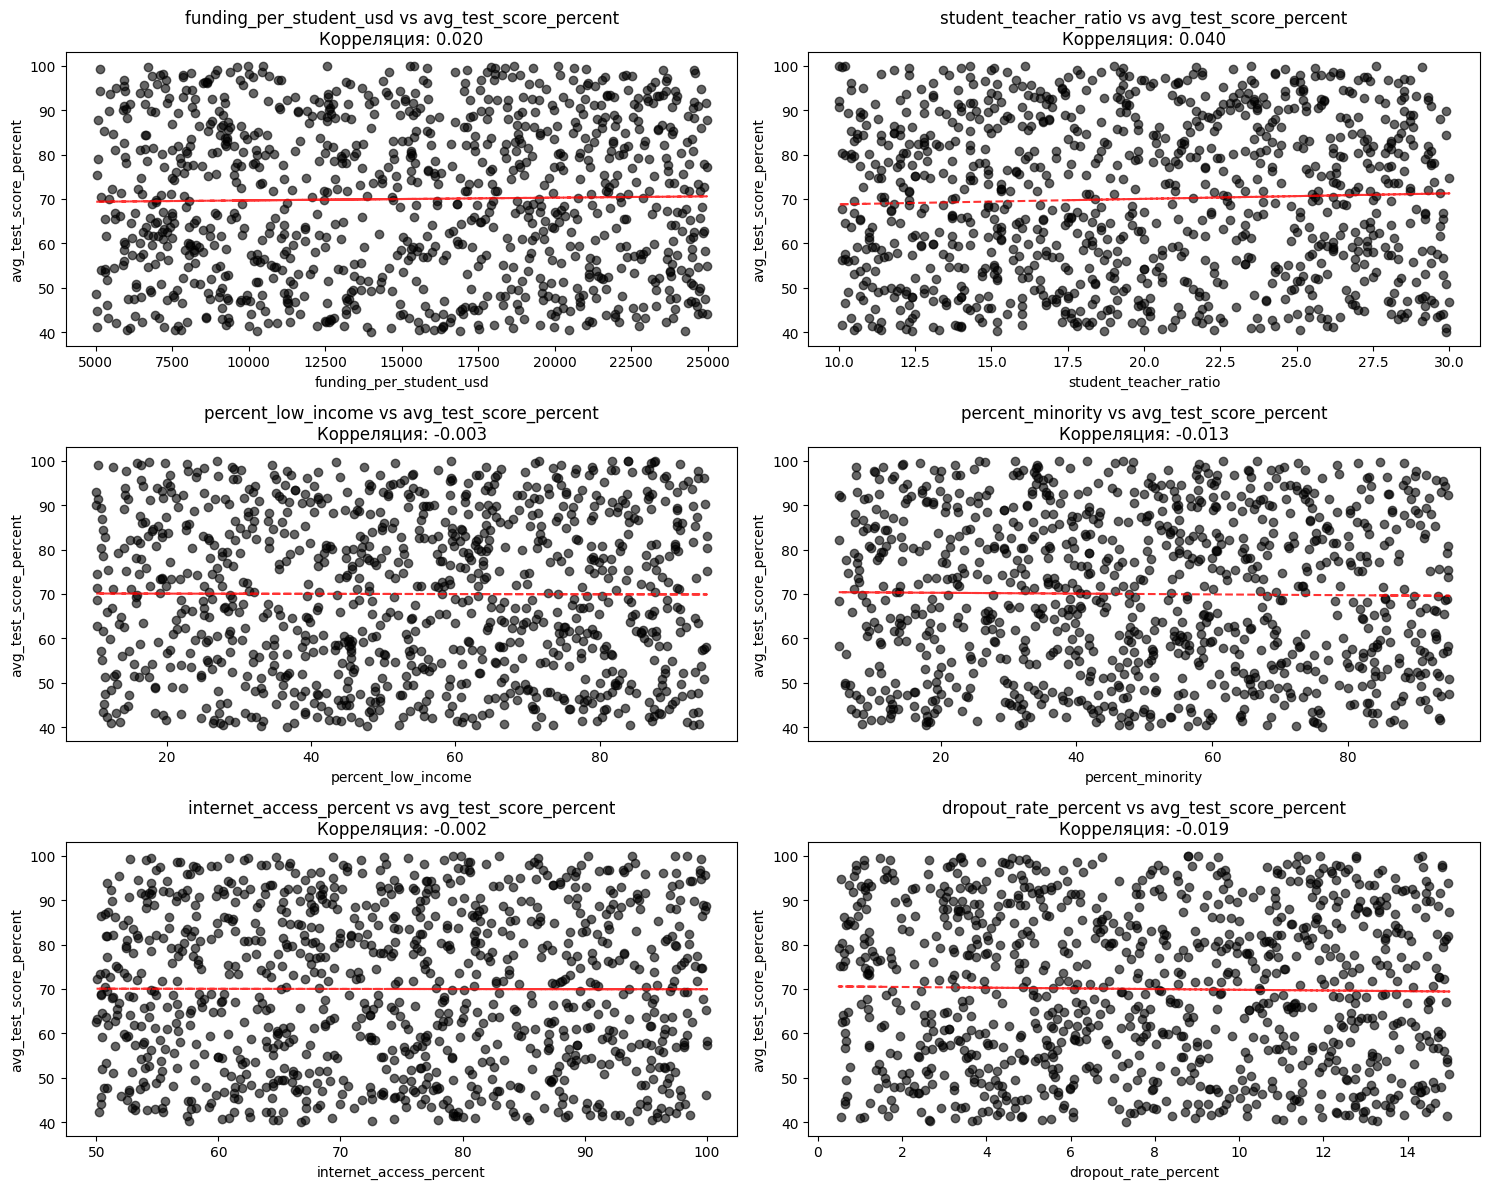

In [ ]:
numeric_features = [
    'funding_per_student_usd', 'student_teacher_ratio', 'percent_low_income',
    'percent_minority', 'internet_access_percent', 'dropout_rate_percent'
]

fig, axes = plt.subplots(3, 2, figsize=(15,12))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    correlation = df[feature].corr(df['avg_test_score_percent'])

    axes[i].scatter(df[feature], df['avg_test_score_percent'], color='black', alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('avg_test_score_percent')
    axes[i].set_title(f'{feature} vs avg_test_score_percent\nКорреляция: {correlation:.3f}')


    z = np.polyfit(df[feature], df['avg_test_score_percent'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

funding_per_student_usd: Связь отсутствует, либо слабая - Школы с большим финансированием не показывают заметно более высокие баллы (Значение положительное, близко к 0)

student_teacher_ratio: Связь отсутствует, либо слабая - Меньшее количество учеников на учителя не приводит к заметно более высокому среднему баллу (Значение положительное, близко к 0)

percent_low_income: Связь отсутствует,  либо слабая - Большое количество малообеспеченных учеников не показывает заметно более низкие баллы (Значение гораздо меньше, чем требуется для отрицательной кореляции)

percent_minority: Связь отсутствует - Отрицательная связь означала бы, что чем выше процент учащихся из меньшинств, тем ниже средний балл (Значение гораздо меньше, чем требуется для отрицательной кореляции)

internet_access_percent: Связь отсутствует - Доступ к интернету не способствует заметному линейному улучшению результатов (Значение гораздо меньше, чем требуется для отрицательной кореляции)

dropout_rate_percent: Связь отсутствует - Фактически высокие показатели отсева не имеют заметной линейной связи с низкими результатами (Значение гораздо меньше, чем требуется для отрицательной кореляции)

# Отбор лучших признаков

In [ ]:
categorial_features = ['school_type', 'grade_level']
numeric_features = ['funding_per_student_usd', 'student_teacher_ratio', 'percent_low_income', 'internet_access_percent']

best_features = categorial_features + numeric_features

print(f"Категориальные: {categorial_features}")
print(f"Числовые: {numeric_features}")
print(f"Все лучшие признаки: {best_features}")

Категориальные: ['school_type', 'grade_level']
Числовые: ['funding_per_student_usd', 'student_teacher_ratio', 'percent_low_income', 'internet_access_percent']
Все лучшие признаки: ['school_type', 'grade_level', 'funding_per_student_usd', 'student_teacher_ratio', 'percent_low_income', 'internet_access_percent']


Они выбраны так как:

1.school_type: Выбран, так как диаграмма размаха показала незначительные, но наблюдаемые различия в медианном и квартильном распределении тестовых баллов между типами школ.

2.grade_level: Выбран, так как диаграмма размаха показала, что средние тестовые баллы хоть минимально, но различаются между начальным, средним и старшим уровнями школ.

3.funding_per_student_usd: Выбран, несмотря на практически нулевую линейную корреляцию, поскольку является важным экономическим показателем, потенциально влияющим на баллы.

4.student_teacher_ratio: Выбран, несмотря на крайне слабую линейную корреляцию (0.040), поскольку является ключевым структурным показателем, который может иметь нелинейную связь с баллами.

5.percent_low_income: Выбран, несмотря на отсутствие линейной корреляции ), поскольку является важным социально-экономическим фактором, который часто связывают с академической успеваемостью.i

6.nternet_access_percent: Выбран, несмотря на отсутствие линейной корреляции (-0.002), поскольку доступ к цифровым ресурсам может быть значимым фактором, влияющим на успеваемость.

# Масштабирование признаков

In [ ]:
all_categorial_features = ['state', 'school_type', 'grade_level']
all_numeric_features = [
    'funding_per_student_usd', 'student_teacher_ratio', 'percent_low_income',
    'percent_minority', 'internet_access_percent', 'dropout_rate_percent'
]

X_full = df[all_categorial_features + all_numeric_features].copy()


encoder = OneHotEncoder(sparse_output=False, drop='first')
X_categorical_encoded = encoder.fit_transform(X_full[all_categorial_features])
categorical_feature_names = encoder.get_feature_names_out(all_categorial_features)
X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)


X_numerical = X_full[all_numeric_features].reset_index(drop=True)
X_combined = pd.concat([X_numerical, X_categorical_df], axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)
X_scaled = pd.DataFrame(X_scaled, columns=X_combined.columns)

print(f"Размер итоговой матрицы признаков (ВСЕ): {X_scaled.shape}")
print(f"Названия признаков: {list(X_scaled.columns)}")

Размер итоговой матрицы признаков (ВСЕ): (1000, 19)
Названия признаков: ['funding_per_student_usd', 'student_teacher_ratio', 'percent_low_income', 'percent_minority', 'internet_access_percent', 'dropout_rate_percent', 'state_Florida', 'state_Georgia', 'state_Illinois', 'state_Michigan', 'state_New York', 'state_North Carolina', 'state_Ohio', 'state_Pennsylvania', 'state_Texas', 'school_type_Private', 'school_type_Public', 'grade_level_High', 'grade_level_Middle']


# Метрики

In [ ]:
def calculate_metrics(y_true, y_pred):
    MAE = mean_absolute_error(y_true, y_pred)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)

    print(f'MAE: {MAE:.3f}')
    print(f'MAPE: {MAPE:.3f} ({MAPE*100:.2f}%)')
    print(f'R²: {R2:.3f}')
    print(f'MSE: {MSE:.3f}')
    print(f'RMSE: {RMSE:.3f}')

    return {'MAE': MAE, 'MAPE': MAPE, 'R2': R2, 'MSE': MSE, 'RMSE': RMSE}

# Моделирование

## Модель 1

Метрики на всей выборке
MAE: 15.313
MAPE: 0.242 (24.20%)
R²: 0.019
MSE: 307.056
RMSE: 17.523
MAE: 15.313
MAPE: 0.242
R2: 0.019
MSE: 307.056
RMSE: 17.523


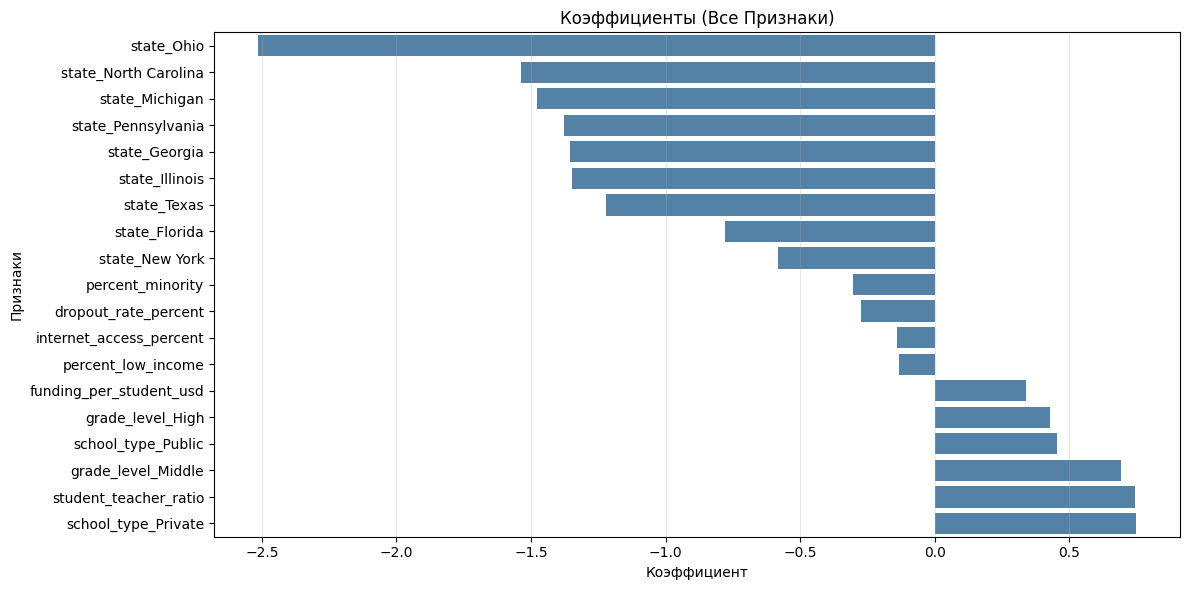

In [ ]:
model1 = LinearRegression()
model1.fit(X_scaled, y_eda)
y_pred1 = model1.predict(X_scaled)

print("Метрики на всей выборке")
metrics1 = calculate_metrics(y_eda, y_pred1)
for k, v in metrics1.items():
    print(f"{k}: {v:.3f}")

plt.figure(figsize=(12,6))
coefficients1 = pd.Series(model1.coef_, index=X_scaled.columns).sort_values()
sns.barplot(x=coefficients1.values, y=coefficients1.index, color='steelblue')
plt.title("Коэффициенты (Все Признаки)")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

MAE ≈ 15.313, MAPE ≈ 24.45%, R² ≈ 0.019, RMSE ≈ 17.523

Модель почти не объясняет вариацию целевой переменной (R² ≈ 0.019), ошибки умеренные (в среднем предсказание отклоняется на ≈ 15.3 процентных пункта, что составляет ≈ 24.28 от среднего балла).

Предсказательная способность крайне низкая.

Линейная зависимость с целевой переменной слабая.

## Модель 2

Метрики на обучающей выборке
MAE: 15.246
MAPE: 0.242 (24.19%)
R²: 0.026
MSE: 304.278
RMSE: 17.444
MAE: 15.246
MAPE: 0.242
R2: 0.026
MSE: 304.278
RMSE: 17.444
Метрики на тестовой выборке
MAE: 15.731
MAPE: 0.240 (24.03%)
R²: -0.036
MSE: 325.731
RMSE: 18.048
MAE: 15.731
MAPE: 0.240
R2: -0.036
MSE: 325.731
RMSE: 18.048


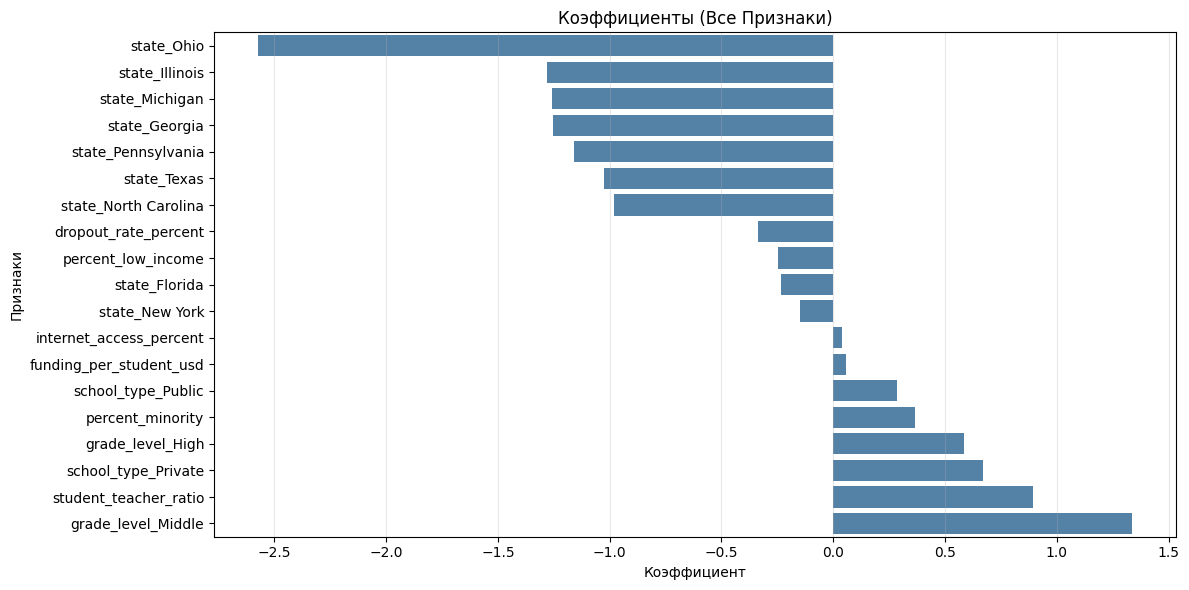

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_eda, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_train_pred2 = model2.predict(X_train2)
y_test_pred2 = model2.predict(X_test2)

print("Метрики на обучающей выборке")
train_metrics2 = calculate_metrics(y_train2, y_train_pred2)
for k, v in train_metrics2.items():
    print(f"{k}: {v:.3f}")

print("Метрики на тестовой выборке")
test_metrics2 = calculate_metrics(y_test2, y_test_pred2)
for k, v in test_metrics2.items():
    print(f"{k}: {v:.3f}")


plt.figure(figsize=(12,6))
coefficients2 = pd.Series(model2.coef_, index=X_scaled.columns).sort_values()
sns.barplot(x=coefficients2.values, y=coefficients2.index, color='steelblue')
plt.title("Коэффициенты (Все Признаки)")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

На обучающей выборке: MAE ≈ 15.246, MAPE ≈ 24.19%, R² ≈ 0.026, RMSE ≈ 17.444$.

На тестовой выборке: MAE ≈ 15.731, MAPE ≈ 24.03%, R² ≈ -0.036, RMSE ≈ 18.048.

Разделение на обучающую и тестовую выборки показывает ухудшение метрик на тестовом наборе. Это видно по падению R² (с 0.026 до -0.036) и небольшому росту MAE/RMSE.R² на тестовой выборке отрицателен (≈ -0.036). Отрицательное значение R² означает, что модель работает хуже, чем простое использование среднего значения целевой переменной для предсказания. Разница между метриками (например, R²) на обучении и тесте не критически большая, что говорит о том, что модель не переобучена на специфике обучающих данных.

Модель стабильна, но ее качество предсказаний крайне низкое, что подтверждается отрицательным R² на тесте. Это указывает на то, что линейная зависимость между полным набором признаков и средним баллом очень слабая или отсутствует.

## Модель 3

Метрики на всей выборке
MAE: 15.444
MAPE: 0.244 (24.45%)
R²: 0.005
MSE: 311.631
RMSE: 17.653
MAE: 15.444
MAPE: 0.244
R2: 0.005
MSE: 311.631
RMSE: 17.653


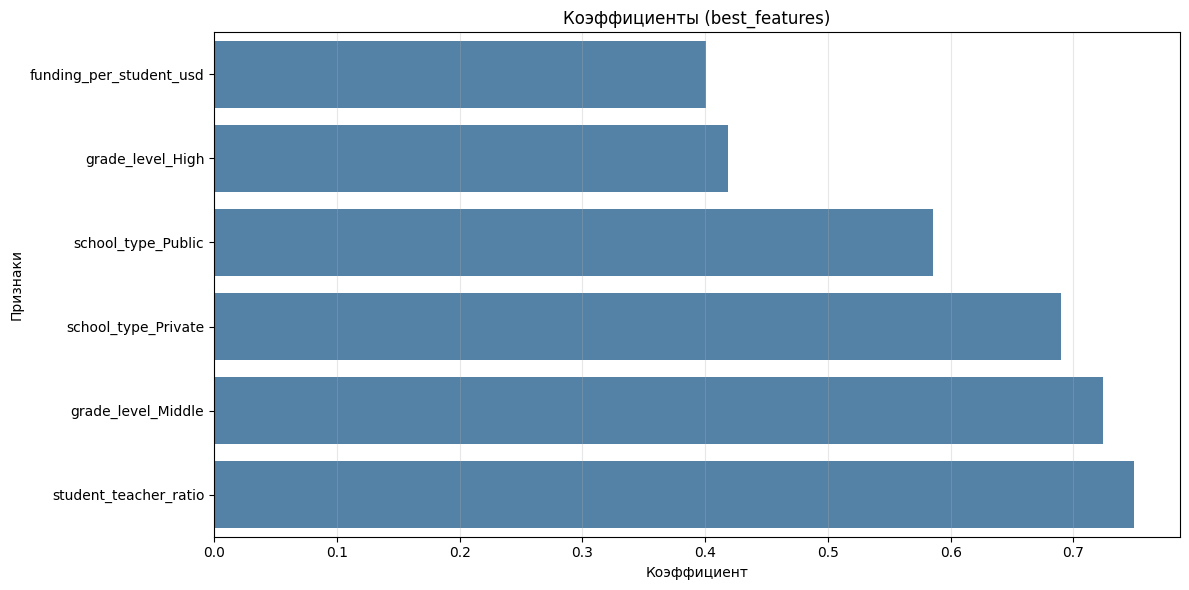

In [ ]:
model3 = LinearRegression()
model3.fit(X_scaled3, y_eda)
y_pred3 = model3.predict(X_scaled3)

print("Метрики на всей выборке")
metrics3 = calculate_metrics(y_eda, y_pred3)
for k, v in metrics3.items():
    print(f"{k}: {v:.3f}")

plt.figure(figsize=(12,6))
coefficients3 = pd.Series(model3.coef_, index=X_scaled3.columns).sort_values()
sns.barplot(x=coefficients3.values, y=coefficients3.index, color='steelblue')
plt.title("Коэффициенты (best_features)")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

MAE ≈ 15.44, MAPE ≈ 24.45%, R² ≈ 0.005, RMSE ≈ 17.65

MAE ≈ 15.444, MAPE ≈ 24.45%, R² ≈ 0.005, RMSE ≈ 17.653.

Метрики почти идентичны Модели 1 (где R² ≈ 0.019), хотя в Модели 3 использовано подмножество отобранных признаков. R² остается крайне низким (≈ 0.005). Это показывает, что отбор признаков позволил сократить количество признаков без потери качества предсказаний.

Учитывая очень низкий R², предсказательная способность по-прежнему крайне слабая.

Ключевые признаки действительно несут основную информацию о целевой переменной, а исключенные признаки были малоинформативны.

## Модель 4

Метрики на обучающей выборке
MAE: 15.380
MAPE: 0.244 (24.45%)
R²: 0.008
MSE: 310.110
RMSE: 17.610
MAE: 15.380
MAPE: 0.244
R2: 0.008
MSE: 310.110
RMSE: 17.610
Метрики на тестовой выборке
MAE: 15.748
MAPE: 0.242 (24.17%)
R²: -0.018
MSE: 320.302
RMSE: 17.897
MAE: 15.748
MAPE: 0.242
R2: -0.018
MSE: 320.302
RMSE: 17.897


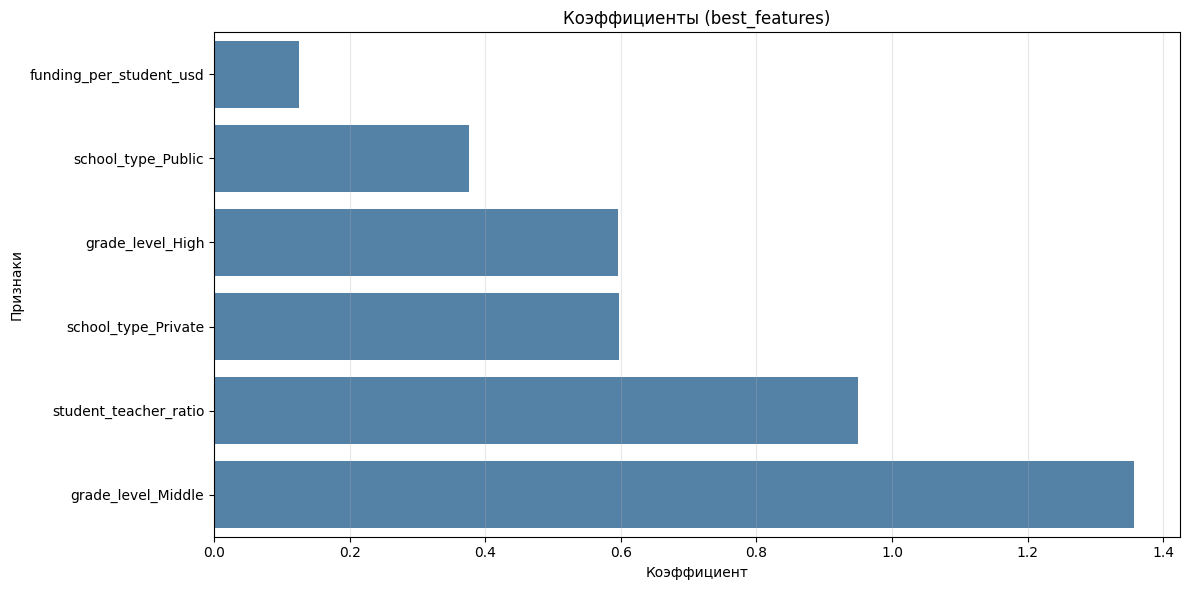

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_scaled3, y_eda, test_size=0.2, random_state=42)
model4 = LinearRegression()
model4.fit(X_train4, y_train4)

y_train_pred4 = model4.predict(X_train4)
y_test_pred4 = model4.predict(X_test4)

print("Метрики на обучающей выборке")
train_metrics4 = calculate_metrics(y_train4, y_train_pred4)
for k, v in train_metrics4.items():
    print(f"{k}: {v:.3f}")

print("Метрики на тестовой выборке")
test_metrics4 = calculate_metrics(y_test4, y_test_pred4)
for k, v in test_metrics4.items():
    print(f"{k}: {v:.3f}")


plt.figure(figsize=(12,6))
coefficients4 = pd.Series(model4.coef_, index=X_scaled3.columns).sort_values()
sns.barplot(x=coefficients4.values, y=coefficients4.index, color='steelblue')
plt.title("Коэффициенты (best_features)")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

На обучающей выборке: MAE ≈ 15.380, MAPE ≈ 24.45%, R² ≈ 0.008, RMSE ≈ 17.610.

На тестовой выборке: MAE ≈ 15.748, MAPE ≈ 24.17%, R² ≈ -0.018, RMSE ≈ 17.89.

Разница между метриками обучения и теста небольшая, а R² на тесте отрицателен.Это говорит о том, что модель стабильна, но ее предсказательная способность очень низка.

Использование только лучших признаков не ухудшило качество предсказания по сравнению с использованием всех признаков, подтверждая, что именно эти отобранные признаки несут основную информацию (хотя этой информации недостаточно для хорошего линейного предсказания).

Модель стабильна. Использование только лучших признаков не ухудшило качество, что подтверждает, что они несут основную информацию для предсказания.